##  HashNet

An experimental foray into neural networks. 

Disclaimer: I have little idea how neural networks or deep learning actually works.
This is a simple exploration to build a neural net along some crazy ideas I had. 


The broad idea: 

The input layer, (say a simple black and white image) can be reduced to a single input 'neuron' by reducing two pixels from the original image to one neuron, stored in a hash dictionary, then reduce 2 of those neurons down to one and so on. 


Since this proceedure relies on adding new neurons as more data becomes available, it is scalable on the fly. 

In [10]:
%matplotlib inline

from skimage import data
import matplotlib.pyplot as plt


In [53]:
# some test input:

checkboard = [[0,0,1,1,0,0,1,1,0,0,1,1],
              [0,0,1,1,0,0,1,1,0,0,1,1],
              [1,1,0,0,1,1,0,0,1,1,0,0],
              [1,1,0,0,1,1,0,0,1,1,0,0],
              [0,0,1,1,0,0,1,1,0,0,1,1],
              [0,0,1,1,0,0,1,1,0,0,1,1],
              [1,1,0,0,1,1,0,0,1,1,0,0],
              [1,1,0,0,1,1,0,0,1,1,0,0],
              [0,0,1,1,0,0,1,1,0,0,1,1],
              [0,0,1,1,0,0,1,1,0,0,1,1],
              [1,1,0,0,1,1,0,0,1,1,0,0],
              [1,1,0,0,1,1,0,0,1,1,0,0]]

smile      = [[0,0,0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0],
              [0,0,0,1,1,0,0,1,1,0,0,0],
              [0,0,0,1,1,0,0,1,1,0,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0],
              [0,0,1,1,0,0,0,0,1,1,0,0],
              [0,0,0,1,1,0,0,1,1,0,0,0],
              [0,0,0,0,1,1,1,1,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0],
              [0,0,0,0,0,0,0,0,0,0,0,0]]



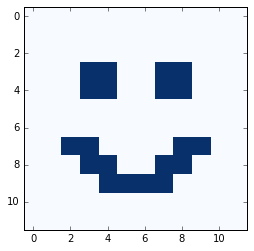

In [88]:
#checkboard.shape
testdata = smile
plt.imshow(testdata,cmap="Blues",interpolation='nearest')


In [89]:
def countpixels(image):
     '''quick function to count pixels in an image'''
     m,n = 0,0
     length = len(image)  # assumes image is square
     for i in range(0,length):
         m = m + testdata[i].count(1)
         n = n + testdata[i].count(0)
     total= length*length
     return (m,n, total)

In [90]:
# a quick count of pixels: 
m,n,t = countpixels(testdata)
print ("total pixels: {}  black: {}  white: {}".format(t,m,n))

total pixels: 144  black: 20  white: 124


In [113]:
def flatten(image):
    '''simple function to convert 2D image list to linear list'''
    c = [item for sublist in image for item in sublist]
    return c

In [131]:
def add2hash(i,j,d):
    '''function to add coordinates (i,j) to dictionary'''
    key = str(i)+":"+str(j)
    l = len(d)
    d[key]= l+1
    print(key,len(d))
    return d

In [132]:
# Need to connect every 2 black pixels to a neuron 
# Convert image into a long list: 
flatimage = flatten(testdata)
print (flatimage), len(flatimage)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


(None, 144)

In [133]:
# find pairs to combine to add to dictionary level 0 
d0 ={}   # initialize a dictionary (level 0)

l = len(flatimage)
level = 0
i = 0 
while (i < l-1):
    i+=1 
    j =0
    if flatimage[i] == 1:
        j+=1
        if flatimage[i+j] == 1:
            add2hash(i,i+j,d0)
        i+=1
print (d0)

39:40 1
43:44 2
51:52 3
55:56 4
86:87 5
92:93 6
99:100 7
103:104 8
112:113 9
114:115 10
{'55:56': 4, '103:104': 8, '112:113': 9, '43:44': 2, '86:87': 5, '39:40': 1, '99:100': 7, '51:52': 3, '114:115': 10, '92:93': 6}
